# COMBO-17

# APARTAT C
# Correlacions entre variables 

In [3]:
#### Importa llibreries
#from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import scipy.stats
from scipy import stats
import seaborn as sns

In [4]:
### Llegir base de dades 
df = pd.read_csv('COMBO17.csv', header=0, delimiter=',')
df

Nr    Rmag  e.Rmag  ApDRmag   mumax    Mcz  e.Mcz  MCzml  chi2red  \
0        6  24.995   0.097    0.935  24.214  0.832  0.036  1.400     0.64   
1        9  25.013   0.181   -0.135  25.303  0.927  0.122  0.864     0.41   
2       16  24.246   0.054    0.821  23.511  1.202  0.037  1.217     0.92   
3       21  25.203   0.128    0.639  24.948  0.912  0.177  0.776     0.39   
4       26  25.504   0.112   -1.588  24.934  0.848  0.067  1.330     1.45   
...    ...     ...     ...      ...     ...    ...    ...    ...      ...   
3457  9990  24.962   0.186   -0.113  25.189  0.960  0.190  0.951     0.89   
3458  9992  21.918   0.017   -0.562  23.063  0.770  0.031  0.766     0.90   
3459  9995  23.701   0.051   -0.437  24.053  0.775  0.121  1.330     0.60   
3460  9996  23.473   0.098   -1.114  25.075  0.926  0.087  0.870     1.01   
3461  9997  25.621   0.298   -0.224  25.488  0.968  0.139  0.957     1.13   

      UjMAG  ...      UFS    e.UFS      BFS     e.BFS       VFD    e.VFD  \
0    -17.67  ...  0.01870  0.00239  0.01630  0.001290  0.017300  0.00141   
1    -18.28  ...  0.00706  0.00238  0.00420  0.001150  0.003930  0.00182   
2    -19.75  ...  0.01260  0.00184  0.01830  0.001150  0.018800  0.00167   
3    -17.83  ...  0.01410  0.00186  0.01180  0.001100  0.009670  0.00204   
4    -17.69  ...  0.00514  0.00170  0.00102  0.001270  0.000039  0.00160   
...     ...  ...      ...      ...      ...       ...       ...      ...   
3457 -18.21  ...  0.00643  0.00170  0.00361  0.001150  0.004890  0.00147   
3458 -20.47  ...  0.03700  0.00218  0.04500  0.001310  0.051300  0.00173   
3459 -18.76  ...  0.02050  0.00223  0.01850  0.001090  0.014500  0.00182   
3460 -19.67  ...  0.01150  0.00225  0.00809  0.001190  0.011400  0.00166   
3461 -17.70  ...  0.00387  0.00165  0.00315  0.000949  0.002470  0.00131   

          RFS     e.RFS      IFD    e.IFD  
0     0.01650  0.000434  0.02470  0.00483  
1     0.00723  0.000500  0.00973  0.00460  
2     0.02880  0.000655  0.05700  0.00465  
3     0.01050  0.000416  0.01340  0.00330  
4     0.00139  0.000499  0.00590  0.00444  
...       ...       ...      ...      ...  
3457  0.00625  0.000413  0.00987  0.00323  
3458  0.07210  0.000542  0.10200  0.00477  
3459  0.01580  0.000468  0.01860  0.00484  
3460  0.01070  0.000454  0.01930  0.00390  
3461  0.00317  0.000426  0.00746  0.00415  

[3462 rows x 65 columns]

## Columnes no útils pel mapa de correlacions

La primera columna de totes és un identificador únic per a cada filera de dades. L'eliminarem degut a que és un atribut independent de la resta.

Per a cada atribut calculat a la base de dades, hi ha un altre que correspon amb l'error màxim que s'ha pogut cometre depenent de l'eina amb la que s'ha mesurat. Eliminarem aquests atributs perquè tampoc dependran d'altres valors sinò que dependran de l'eina amb la que s'hagi mesurat el valor.

Finalment, els últims cinc atributs son redundants, per tant no els tindrem en compte ja que, al ser redundants, ja els estem tenint en compte en altres atributs.

In [5]:
### Treu les columnes corresponents als errors i de l'identificador
#### Teiem la 0 perquè és Nr, treiem les 5 utltimes perqué són redundants
cols = [col for col in df if not col.startswith('e')][1:-5]
corr_ = df[cols]

Text(0.5, 1.0, 'Mapa de correlacions')

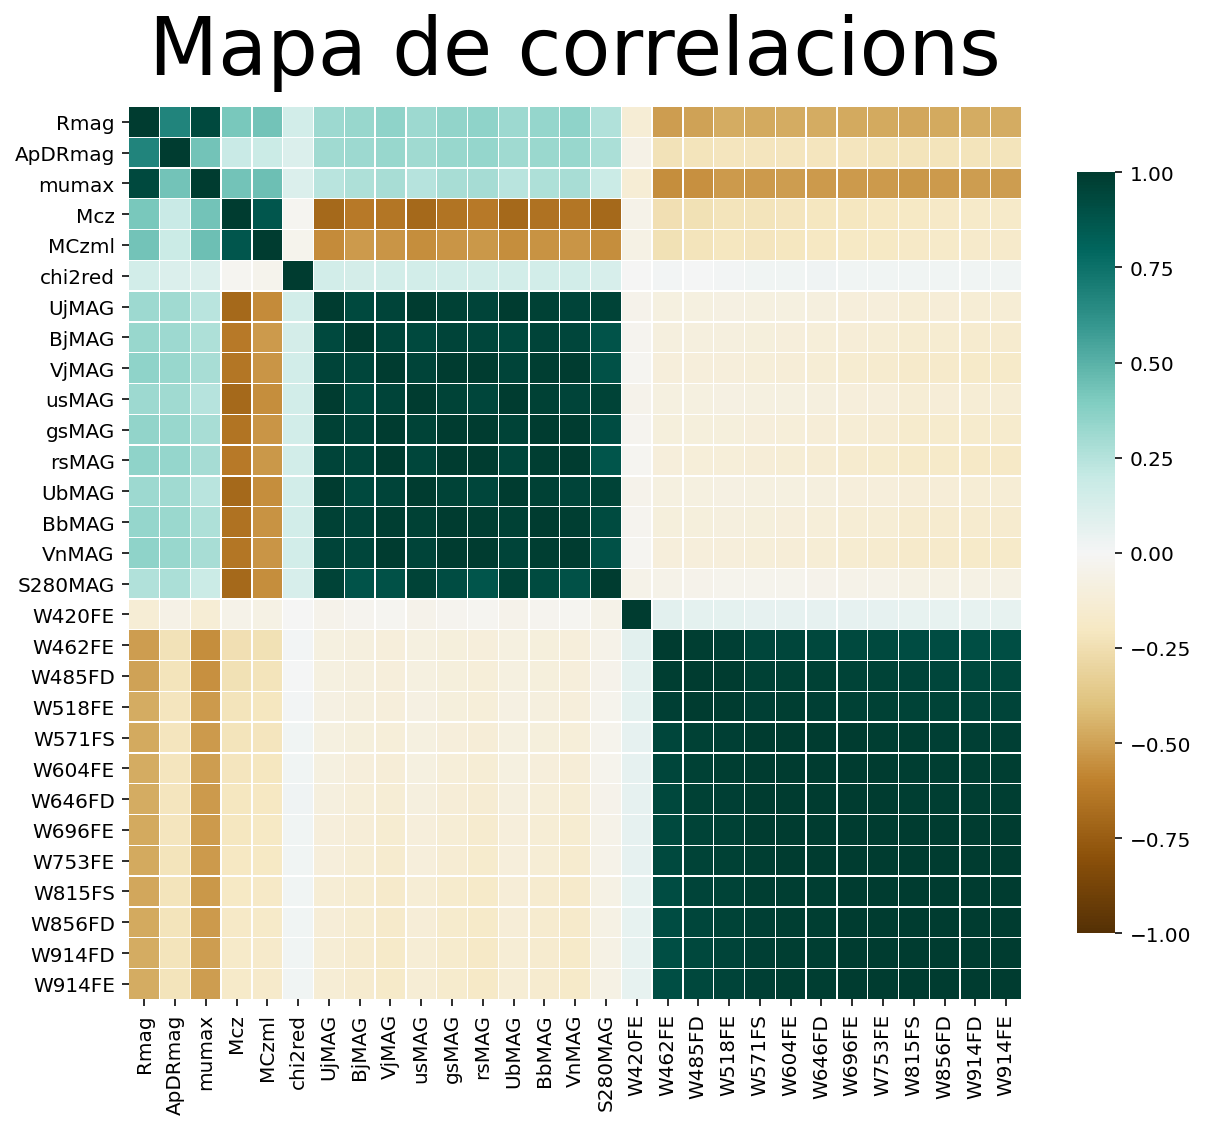

In [6]:
### Plot correlations

plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(corr_.corr(), vmin=-1, vmax=1, annot=False, square=True, linewidths=.2, cbar_kws={"shrink":.7}, cmap='BrBG')
heatmap.set_title('Mapa de correlacions', fontdict={'fontsize':40}, pad=16)

# ATRIBUT OBJECTIU
Els atributs més importants de la nostre base de dades són:
* **Rmag**: Magnitud aparent. Brillantor de la galxia.
* **ApDRmag**: Mesura estimada de la mida de la galaxia.
* **mumax**: Brillantor aparent del centre de la galaxia.
* **Mcz**: Estimació del redshift 
* **10-band Llumniosistat**: Quantitat d'energia electromagnètica
* **13-band Brillantor**: Quantitat de brillantor observada a les 13 bandes de l'espectre electromanètic desde 420nm a 915nm

D'aquest els més relevants a predir són **Rmag** i **Mcz**.
A partir de **Rmag** podem calcular coses com la mida de la galaxia i propietats internes de la mateixa.
Per altre banda, a partir de **Mcz** és poden calcular gran quantitat de coses com per exemple predir a quina velocitat sha expandit l'unviers en qualsevol moment mai a partir d'una regressió lineal amb la distancia de la mateixa galaxia. En definitiva, és molt importnat per estudiar coses com la constant de hubble, la mida de l'univers observable, l'evolució de les galaxies, entre d'altres.
Per aquesta raó decidim escollir aquest com atribut objectiu del qual depen inversament a als atributs que definieixen les 10-bandes de lluminosistat, tal i com podem observar al gràfic anterior.

# Estudi dels atributs realacionat amb Mcz

## Agafar atributs relacionats

In [7]:
### Mirem si tenim nulls 
print(df.isnull().values.any())
print(df.isnull().sum().sum())

True
50


In [8]:
## Els esborrem
corr = df[['UjMAG', 'UbMAG', 'VnMAG', 'VjMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 'S280MAG', 'BbMAG', 'Mcz']]
corr = corr.apply(pd.to_numeric, errors='coerce')
corr = corr.dropna()

## Eliminem outliers

In [9]:
## Treiem els elments amb valor > 3 dins la desviació estàndard repecte a cada columna
corr = corr[np.abs(stats.zscore(corr) < 3).all(axis=1)]
corr

UjMAG  UbMAG  VnMAG  VjMAG  rsMAG  usMAG  gsMAG  BjMAG  S280MAG  BbMAG  \
0    -17.67 -17.76 -17.76 -17.76 -17.97 -17.83 -17.60 -17.54   -18.22 -17.53   
2    -19.75 -19.82 -20.40 -20.41 -20.71 -19.87 -20.05 -19.91   -19.77 -19.89   
3    -17.83 -17.92 -17.67 -17.67 -17.89 -17.98 -17.47 -17.39   -18.12 -17.38   
4    -17.69 -17.76 -19.37 -19.37 -19.88 -17.81 -18.69 -18.40   -13.93 -18.35   
5    -19.22 -19.30 -18.69 -18.70 -19.05 -19.34 -18.27 -18.11   -19.18 -18.08   
...     ...    ...    ...    ...    ...    ...    ...    ...      ...    ...   
3457 -18.21 -18.30 -18.26 -18.27 -18.49 -18.35 -18.05 -17.97   -18.29 -17.95   
3458 -20.47 -20.55 -20.65 -20.66 -20.92 -20.62 -20.44 -20.35   -20.62 -20.34   
3459 -18.76 -18.86 -18.59 -18.59 -18.81 -18.95 -18.50 -18.36   -19.44 -18.35   
3460 -19.67 -19.76 -19.89 -19.89 -20.12 -19.82 -19.67 -19.58   -20.10 -19.56   
3461 -17.70 -17.78 -18.31 -18.31 -18.62 -17.83 -17.95 -17.81   -17.71 -17.79   

        Mcz  
0     0.832  
2     1.202  
3     0.912  
4     0.848  
5     0.882  
...     ...  
3457  0.960  
3458  0.770  
3459  0.775  
3460  0.926  
3461  0.968  

[3375 rows x 11 columns]

## Propietats estadístiques dels atributs

In [10]:
corr.describe()

UjMAG        UbMAG        VnMAG        VjMAG        rsMAG  \
count  3375.000000  3375.000000  3375.000000  3375.000000  3375.000000   
mean    -17.996999   -18.083680   -18.233846   -18.238199   -18.507680   
std       1.754146     1.752772     1.899095     1.898729     1.913842   
min     -23.210000   -23.280000   -23.620000   -23.620000   -23.940000   
25%     -19.100000   -19.190000   -19.430000   -19.440000   -19.720000   
50%     -18.250000   -18.330000   -18.490000   -18.500000   -18.750000   
75%     -17.370000   -17.460000   -17.505000   -17.510000   -17.750000   
max     -12.010000   -12.110000   -11.940000   -11.940000   -12.180000   

             usMAG        gsMAG        BjMAG      S280MAG        BbMAG  \
count  3375.000000  3375.000000  3375.000000  3375.000000  3375.000000   
mean    -18.147040   -17.974824   -17.887206   -18.131283   -17.867775   
std       1.750763     1.858603     1.832070     1.745444     1.830353   
min     -23.330000   -23.280000   -23.150000   -23.590000   -23.130000   
25%     -19.250000   -19.140000   -19.040000   -19.250000   -19.020000   
50%     -18.390000   -18.250000   -18.180000   -18.390000   -18.160000   
75%     -17.520000   -17.250000   -17.160000   -17.440000   -17.140000   
max     -12.200000   -11.870000   -11.780000   -12.360000   -11.760000   

               Mcz  
count  3375.000000  
mean      0.739609  
std       0.310000  
min       0.028000  
25%       0.551000  
50%       0.816000  
75%       0.984000  
max       1.379000

Text(0, 0.5, 'Freqüència')

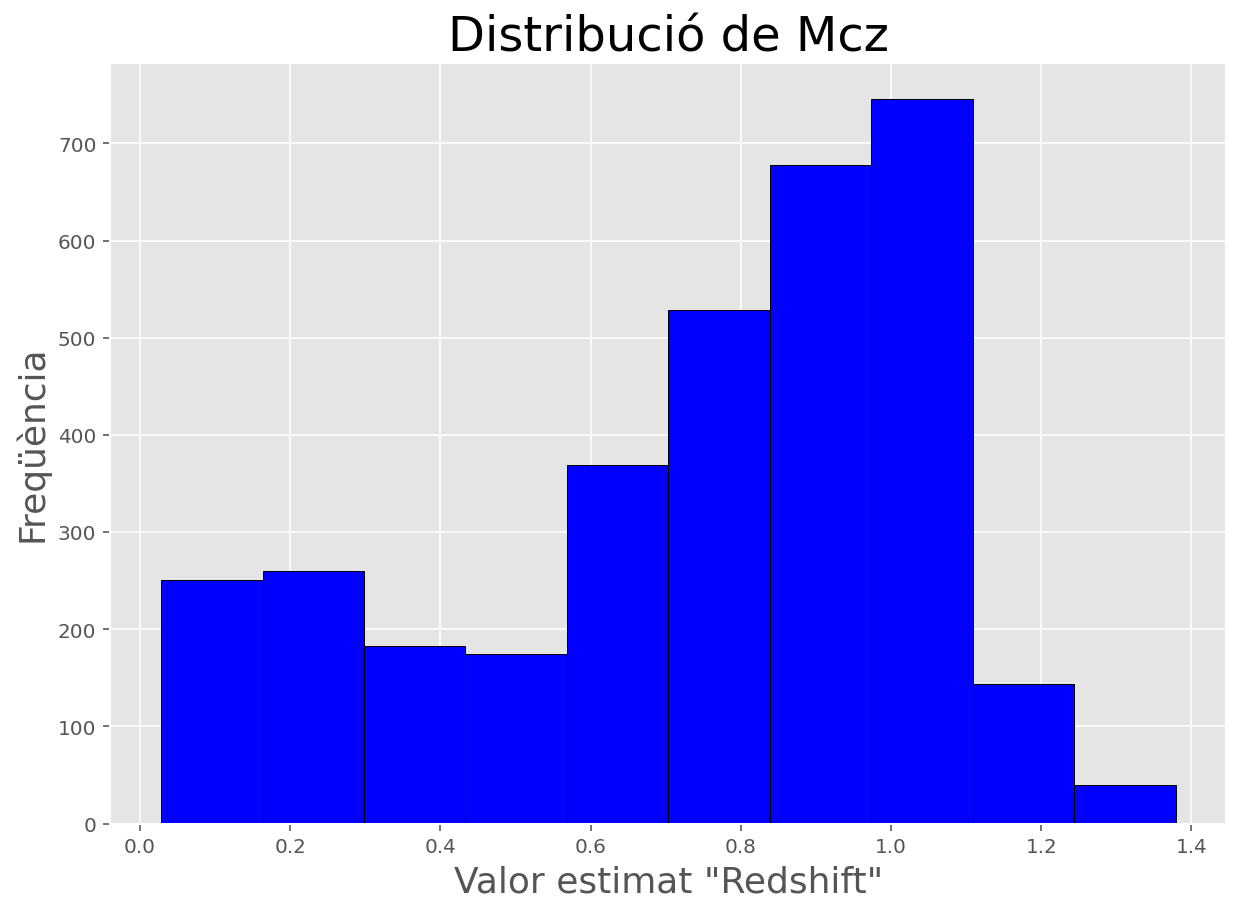

In [11]:
plt.style.use('ggplot')
corr.Mcz.plot(kind='hist', color='blue', edgecolor='black', figsize=(10,7))
plt.title('Distribució de Mcz', size=24)
plt.xlabel('Valor estimat "Redshift"', size=18)
plt.ylabel('Freqüència', size=18)

Com podem observar al gràfic anterior la majoria de redshifts estan sobre el valor tla, aixó ens mostra com totes les galaxies observades es troben en un distancia relativament pròxima(de l'ordre de pocs mil millions anys llum)

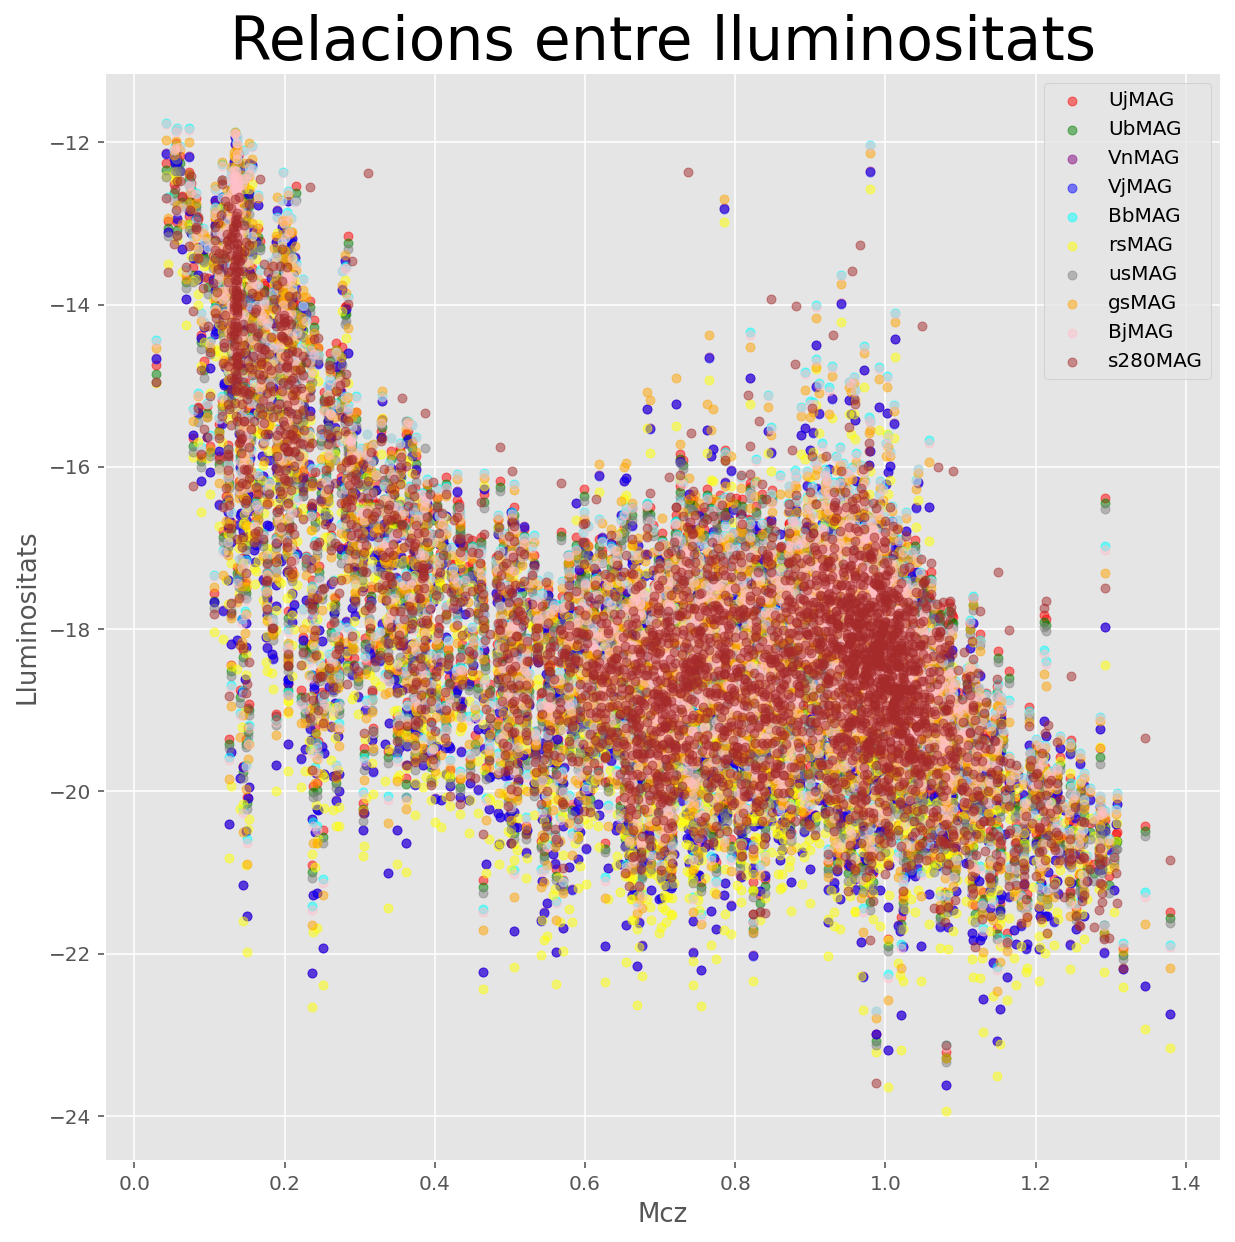

In [12]:
## TODO scatter plot de totes les lluminositats juntes
ax1 = corr[['UjMAG', 'Mcz']].plot(kind='scatter', color='red', y='UjMAG', x='Mcz', alpha=0.5, figsize=(10,10))
corr[['UbMAG', 'Mcz']].plot(kind='scatter', color='green', y='UbMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['VnMAG', 'Mcz']].plot(kind='scatter', color='purple', y='VnMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['VjMAG', 'Mcz']].plot(kind='scatter', color='blue', y='VjMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['BbMAG', 'Mcz']].plot(kind='scatter', color='cyan', y='BbMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['rsMAG', 'Mcz']].plot(kind='scatter', color='yellow', y='rsMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['usMAG', 'Mcz']].plot(kind='scatter', color='grey', y='usMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['gsMAG', 'Mcz']].plot(kind='scatter', color='orange', y='gsMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['BjMAG', 'Mcz']].plot(kind='scatter', color='pink', y='BjMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
corr[['S280MAG', 'Mcz']].plot(kind='scatter', color='brown', y='S280MAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)
plt.legend(labels=['UjMAG','UbMAG', 'VnMAG', 'VjMAG', 'BbMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 's280MAG'])
plt.title('Relacions entre lluminositats', size=30)
plt.xlabel('Mcz', size=13)
plt.ylabel('Lluminositats', size=13);

# APARTAT B
# Regressió multivariable

In [13]:
## Creació de les variables
X = corr[['UjMAG', 'UbMAG', 'VnMAG', 'VjMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 'S280MAG', 'BbMAG']]
#x1 = corr[['UjMAG']]
Y = corr[['Mcz']]
Y

Mcz
0     0.832
2     1.202
3     0.912
4     0.848
5     0.882
...     ...
3457  0.960
3458  0.770
3459  0.775
3460  0.926
3461  0.968

[3375 rows x 1 columns]

In [14]:
X

UjMAG  UbMAG  VnMAG  VjMAG  rsMAG  usMAG  gsMAG  BjMAG  S280MAG  BbMAG
0    -17.67 -17.76 -17.76 -17.76 -17.97 -17.83 -17.60 -17.54   -18.22 -17.53
2    -19.75 -19.82 -20.40 -20.41 -20.71 -19.87 -20.05 -19.91   -19.77 -19.89
3    -17.83 -17.92 -17.67 -17.67 -17.89 -17.98 -17.47 -17.39   -18.12 -17.38
4    -17.69 -17.76 -19.37 -19.37 -19.88 -17.81 -18.69 -18.40   -13.93 -18.35
5    -19.22 -19.30 -18.69 -18.70 -19.05 -19.34 -18.27 -18.11   -19.18 -18.08
...     ...    ...    ...    ...    ...    ...    ...    ...      ...    ...
3457 -18.21 -18.30 -18.26 -18.27 -18.49 -18.35 -18.05 -17.97   -18.29 -17.95
3458 -20.47 -20.55 -20.65 -20.66 -20.92 -20.62 -20.44 -20.35   -20.62 -20.34
3459 -18.76 -18.86 -18.59 -18.59 -18.81 -18.95 -18.50 -18.36   -19.44 -18.35
3460 -19.67 -19.76 -19.89 -19.89 -20.12 -19.82 -19.67 -19.58   -20.10 -19.56
3461 -17.70 -17.78 -18.31 -18.31 -18.62 -17.83 -17.95 -17.81   -17.71 -17.79

[3375 rows x 10 columns]

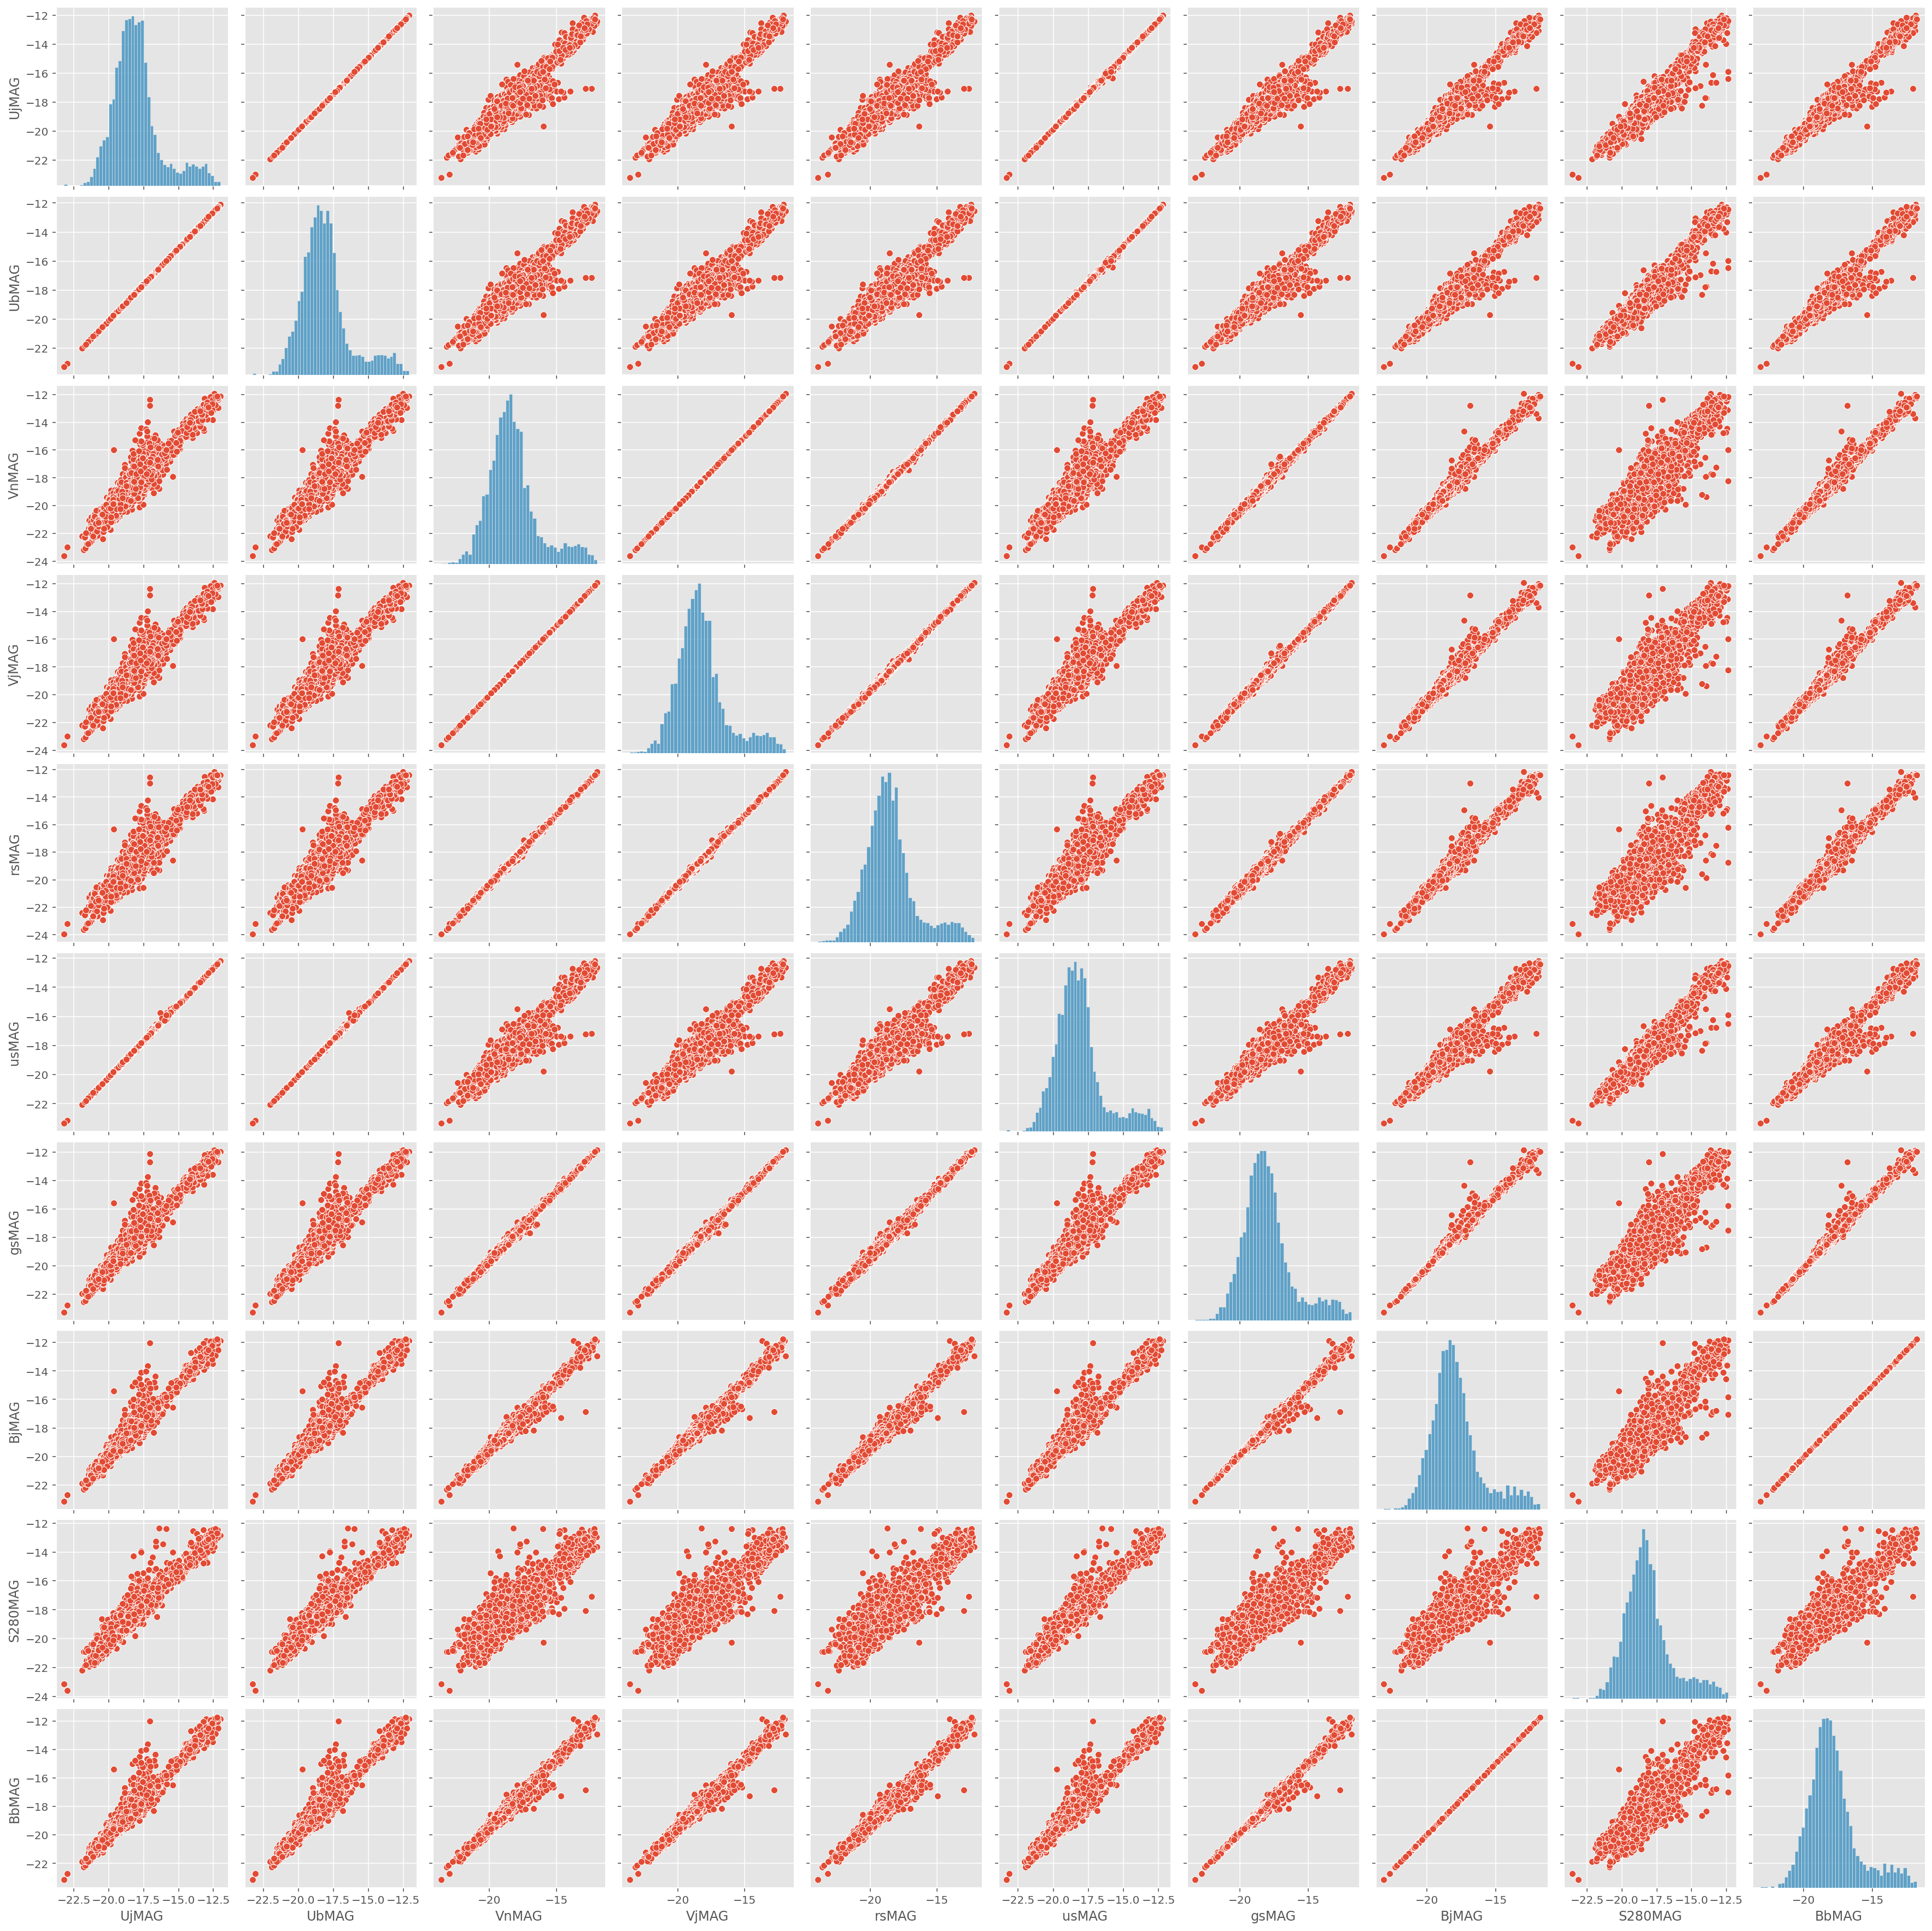

In [15]:
relacio = sns.pairplot(X)


In [16]:
def standarize(x_train):
    mean = x_train.mean(0)
    std = x_train.std(0)
    x_t = x_train - mean[None, :]
    x_t /= std[None, :]
    return x_t

In [17]:
features = ['UjMAG', 'UbMAG', 'VnMAG', 'VjMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 'S280MAG', 'BbMAG']
target = ['Mcz']

X = standarize(corr[features])
Y = corr[target]

<ipython-input-16-179882083611>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t = x_train - mean[None, :]
<ipython-input-16-179882083611>:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x_t /= std[None, :]


In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#X_train = x[['UjMAG']][x.shape[0]//2:]
#Y_train = y[len(Y)//2:]

#X_test = x[['UjMAG']][:x.shape[0]//2+1]
#Y_test = y[:len(Y)//2+1]

In [27]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(x_test)

In [29]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [30]:
#plt.figure()
#ax = plt.scatter(x_test, y_test, color='red')
#plt.scatter(x_test, y_pred, color='blue')
#plt.yticks(range(min(y_test), max(y_test)+1))
x_test.shape, y_test.shape, y_pred.shape
#ax1 = .plot(kind='scatter', color='red', y='UjMAG', x='Mcz', alpha=0.5, figsize=(10,10))
#corr[['UbMAG', 'Mcz']].plot(kind='scatter', color='green', #y='UbMAG', x='Mcz', alpha=0.5, figsize=(10,10), ax=ax1)

((675, 10), (675, 1), (675, 1))

In [31]:
#X1 = np.array(X)
#Y1 = np.array(Y)
#import copy
#x_train, y_train, x_val, y_val = split_data(X1,  Y1)
#x_train2 = copy.deepcopy(x_train)
#x_train2 = standarize(x_train2)
#x_test2 = copy.deepcopy(x_test)
#x_test2= standarize(x_test2)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train = scaler.transform(x_train)
#x_test = scaler.transform(x_test)
#print(x_test, x_test2)
#x_train == x_train2, x_test == x_test2
#test_img = scaler.transform(test_img)

In [32]:
features = ['UjMAG', 'UbMAG', 'VnMAG', 'VjMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 'S280MAG', 'BbMAG']
target = ['Mcz']

X = corr[features]
Y = corr[target]

In [33]:
X1 = np.array(X)
Y1 = np.array(Y)

x_train, y_train, x_test, y_test = split_data(X1,  Y1)
x_train = standarize(x_train)

NameError: name 'split_data' is not defined

In [34]:
#x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size =0.01, shuffle= True)
#x_train = standarize(x_train)

In [35]:
pca = PCA(n_components = 2)
pca.fit(x_train)
pca.explained_variance_

array([31.8702865 ,  0.88040398])

In [36]:
x_train_pca = pca.transform(x_train)
print("original shape:   ", x_train.shape) 
print("transformed shape:", x_train_pca.shape)
x_test_pca = pca.transform(x_test)
print("original shape:   ", x_test.shape)
print("transformed shape:", x_test_pca.shape)

original shape:    (2700, 10)
transformed shape: (2700, 2)
original shape:    (675, 10)
transformed shape: (675, 2)


In [37]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

NameError: name 'y' is not defined

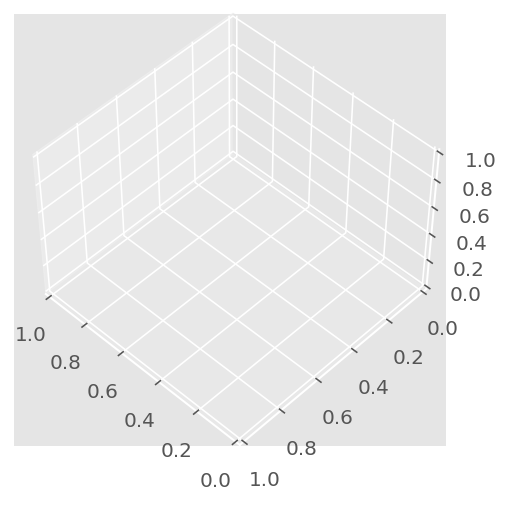

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(4, 3))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(y_test, x_test, y_pred, c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show


In [39]:
def split_data(x, y, train_ratio=0.8):
    indices = np.arange(x.shape[0])
    np.random.shuffle(indices)
    n_train = int(np.floor(x.shape[0]*train_ratio))
    indices_train = indices[:n_train]
    indices_val = indices[n_train:] 
    x_train = x[indices_train, :]
    y_train = y[indices_train]
    x_val = x[indices_val, :]
    y_val = y[indices_val]
    return x_train, y_train, x_val, y_val

def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

X1 = np.array(principal_frame)
Y1 = np.array(Y)

x_train, y_train, x_val, y_val = split_data(X1,  Y1)

regr = regression(x_train, y_train)
error = mean_squeared_error(y_val, regr.predict(x_val)) # calculem error
r2 = r2_score(y_val, regr.predict(x_val))

print("Error mse: %f" %(error))
print("R2 score: %f" %(r2))


a = principalComponents[['Principal Component 1']]

print(a)

fig = plt.figure().gca(projection='3d')
fig.scatter(principalComponents['Principal Component 1'], y, principalComponents['Principal Component 2'])

"""xdata = principalComponents[0]
ydata = y
zdata = principalComponents[1]"""


ax.scatter(xdata, ydata, zdata, cmap='Greens')

NameError: name 'principal_frame' is not defined

In [40]:
regr = linear_model.LinearRegression()
regr.fit(x, y)
y_pred = regr.predict(x)
plt.scatter(x, y)
plt.plot(x, y_pred, color='blue')

NameError: name 'linear_model' is not defined

In [41]:
## Crea regressió lineal
X_train = X[['UjMAG']][X.shape[0]//2:]
Y_train = Y[len(Y)//2:]

X_test = X[['UjMAG']][:X.shape[0]//2+1]
Y_test = Y[:len(Y)//2+1]

#X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
#X[['UjMAG']][X.shape[0]//2:].shape, Y[len(Y)//2:].shape

NameError: name 'linear_model' is not defined

In [42]:
import math

def mean_squeared_error(y1, y2):
    # comprovem que y1 i y2 tenen la mateixa mida
    assert(len(y1) == len(y2))
    mse = 0
    for i in range(len(y1)):
        mse += (y1[i] - y2[i])**2
    return mse / len(y1)


In [43]:
pred = regr.predict(X_test)
ax1 = corr[['UjMAG','Mcz']].plot(kind='scatter', color='red', x='UjMAG', y='Mcz', alpha=0.5, figsize=(10,10))
plt.plot(X_test, pred, color='blue')
#X_test, np.array(Y_test)[:,0]

NameError: name 'regr' is not defined

In [44]:
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

atribut1=X[:,0].reshape(X.shape[0],1)
regr = regression(atribut1, Y)
predicted = regr.predict(atribut1)

plt.figure()
ax = plt.scatter(x[:,0], y)
plt.plot(atribut1[:,0], predicted, 'r')

X.shape, Y.shape

y = pd.concat([Y,Y,Y,Y,Y,Y,Y,Y,Y,Y], axis = 1, join = 'inner')
y.shape

mse = mean_squeared_error(Y1,Y2)


TypeError: '(slice(None, None, None), 0)' is an invalid key

In [45]:
plt.scatter(Y, x, color = 'b')
plt.plot(res)

NameError: name 'x' is not defined

In [46]:
from sklearn.metrics import r2_score
def regression(x, y):
    # Creem un objecte de regressió de sklearn
    regr = LinearRegression()

    # Entrenem el model per a predir y a partir de x
    regr.fit(x, y)

    # Retornem el model entrenat
    return regr

"""X1 = np.array(X)
Y1 = np.array(Y)
"""
X1 = np.array(X)
Y1 = np.array(Y)

x_train, y_train, x_val, y_val = split_data(X1,  Y1)

for i in range(x_train.shape[1]):
    x_t = x_train[:,i] # seleccionem atribut i en conjunt de train
    x_v = x_val[:,i] # seleccionem atribut i en conjunt de val.
    x_t = np.reshape(x_t,(x_t.shape[0],1))
    x_v = np.reshape(x_v,(x_v.shape[0],1))

    regr = regression(x_t, y_train)     
    error = mean_squeared_error(y_val, regr.predict(x_v)) # calculem error
    r2 = r2_score(y_val, regr.predict(x_v))

    print("Error en atribut %d: %f" %(i, error))
    print("R2 score en atribut %d: %f" %(i, r2))

Error en atribut 0: 0.053177
R2 score en atribut 0: 0.425321
Error en atribut 1: 0.053162
R2 score en atribut 1: 0.425491
Error en atribut 2: 0.061033
R2 score en atribut 2: 0.340425
Error en atribut 3: 0.061008
R2 score en atribut 3: 0.340700
Error en atribut 4: 0.062399
R2 score en atribut 4: 0.325667
Error en atribut 5: 0.053345
R2 score en atribut 5: 0.423506
Error en atribut 6: 0.059503
R2 score en atribut 6: 0.356965
Error en atribut 7: 0.058936
R2 score en atribut 7: 0.363086
Error en atribut 8: 0.053895
R2 score en atribut 8: 0.417568
Error en atribut 9: 0.058841
R2 score en atribut 9: 0.364117


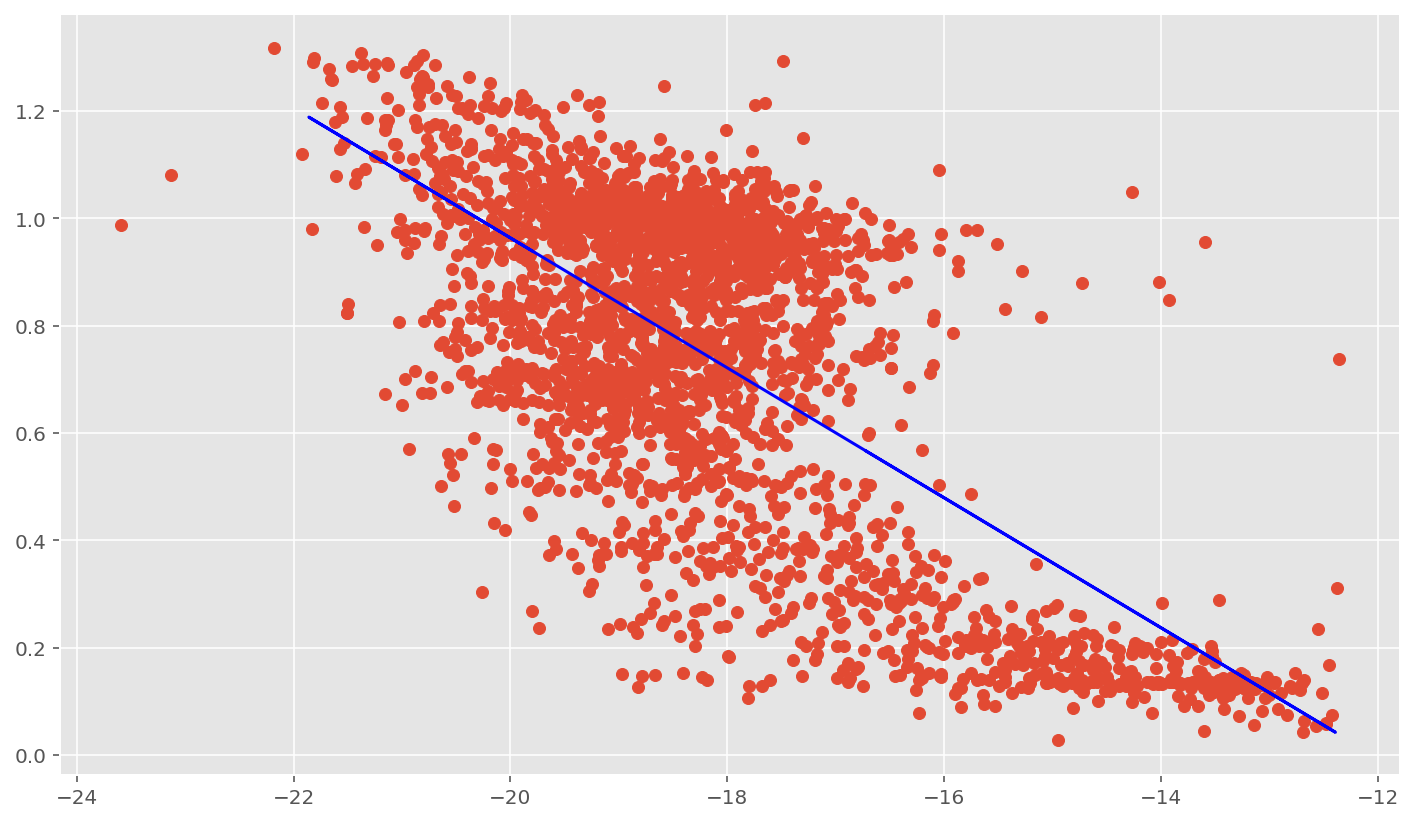

In [47]:
x_t = x_train[:,8] # seleccionem atribut i en conjunt de train
x_v = x_val[:,8] # seleccionem atribut i en conjunt de val.
x_t = np.reshape(x_t,(x_t.shape[0],1))
x_v = np.reshape(x_v,(x_v.shape[0],1))
regr = regression(x_t, y_train)

plt.scatter(x_train[:,8], y_train)
plt.plot(x_v, regr.predict(x_v), 'b')


In [48]:
features = ['UjMAG', 'UbMAG', 'VnMAG', 'VjMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 'S280MAG', 'BbMAG']
target = ['Mcz']

X4 = corr[features]
Y4 = corr[target]
X4 = np.array(X4)
Y4 = np.array(Y4)
x_train, y_train, x_val, y_val = split_data(X4,  Y4)

print(x_train.shape)
print(x_val.shape)

reg = regression(x_train, y_train)

r2 = r2_score(y_val, reg.predict(x_val))

print(r2)

(2700, 10)
(675, 10)
0.5720771435677895


El millor atribut és l'atribut 8, S280MAG

# Apartat A

# Regressió(II)

[9.68480876e-01 2.64015332e-02 3.49319251e-03 1.37889740e-03
 2.00912831e-04 3.00123259e-05 1.33871466e-05 5.29164302e-07
 3.50881517e-07 3.08614362e-07]


Text(0, 0.5, 'variança acumulada')

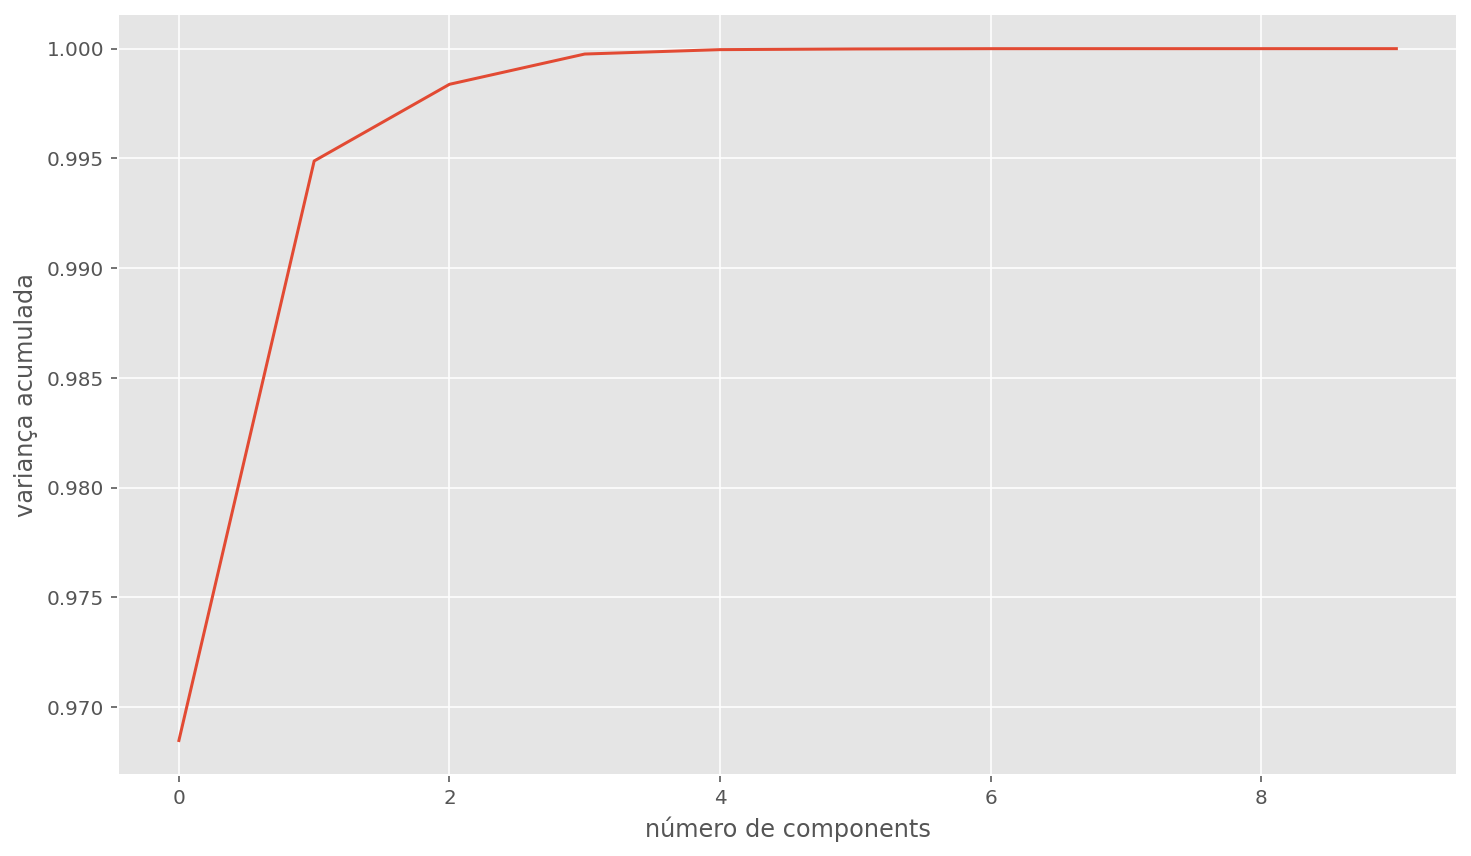

In [49]:
from sklearn.decomposition import PCA

features = ['UjMAG', 'UbMAG', 'VnMAG', 'VjMAG', 'rsMAG', 'usMAG', 'gsMAG', 'BjMAG', 'S280MAG', 'BbMAG']
target = ['Mcz']

X = corr[features]
Y = corr[target]

pca=PCA().fit(X)

explained_variance = pca.explained_variance_ratio_

print(explained_variance)

plt.plot(np.cumsum(explained_variance))
plt.xlabel('número de components')
plt.ylabel('variança acumulada')

In [50]:
class Regressor(object):
    def __init__(self, w0, y0, alpha):
        # Inicialitzem w0 i w1 (per ser ampliat amb altres w's)
        self.w0 = w0
        self.w1 = w1
        self.alpha = alpha


    def predict(self, x):
        # implementar aqui la funció de prediccio
        pass

    def __update(self, hy, y):
        # actualitzar aqui els pesos donada la prediccio (hy) i la y real.
        
        
        pass

    def train(self, max_iter, epsilon):
        
        
        
        for i in range(max_iter):
            hyp = n.dot(x, theta)
            loss = hypothesis - y

            cost = np.sum(loss**2)/(2 * m)
            
            print("Iteration %d | Cost: %f" % (i, cost))
            
            grad = np.dot(x.T, loss)/m
            
            theta = theta - alpha*grad
            
        return theta
            
        # Entrenar durant max_iter iteracions o fins que la millora sigui inferior a epsilon
        pass
    
    
  

[[0.9844403 ]
 [0.01228004]] [0.053007   0.0530065  0.05300601 0.05300552 0.05300502]


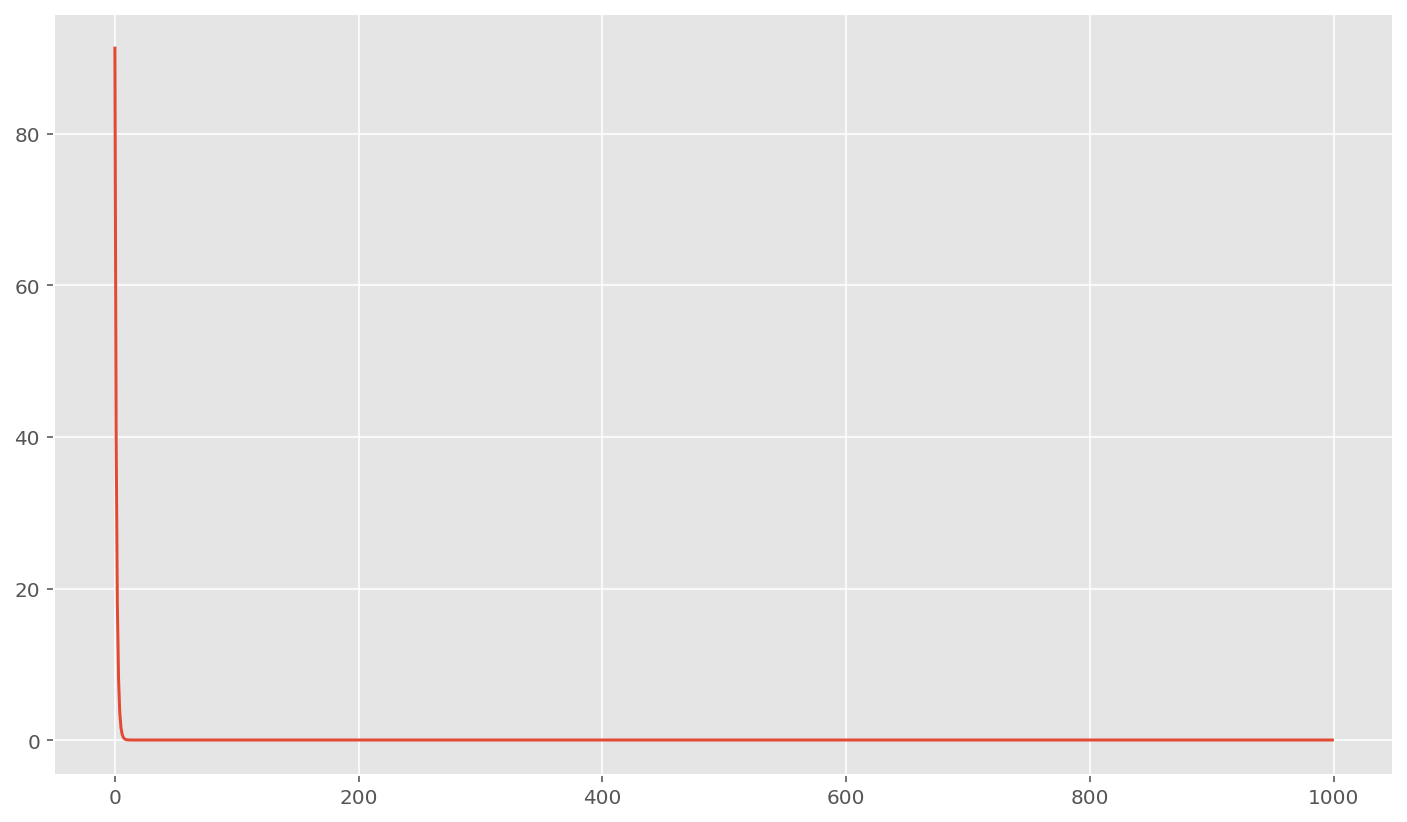

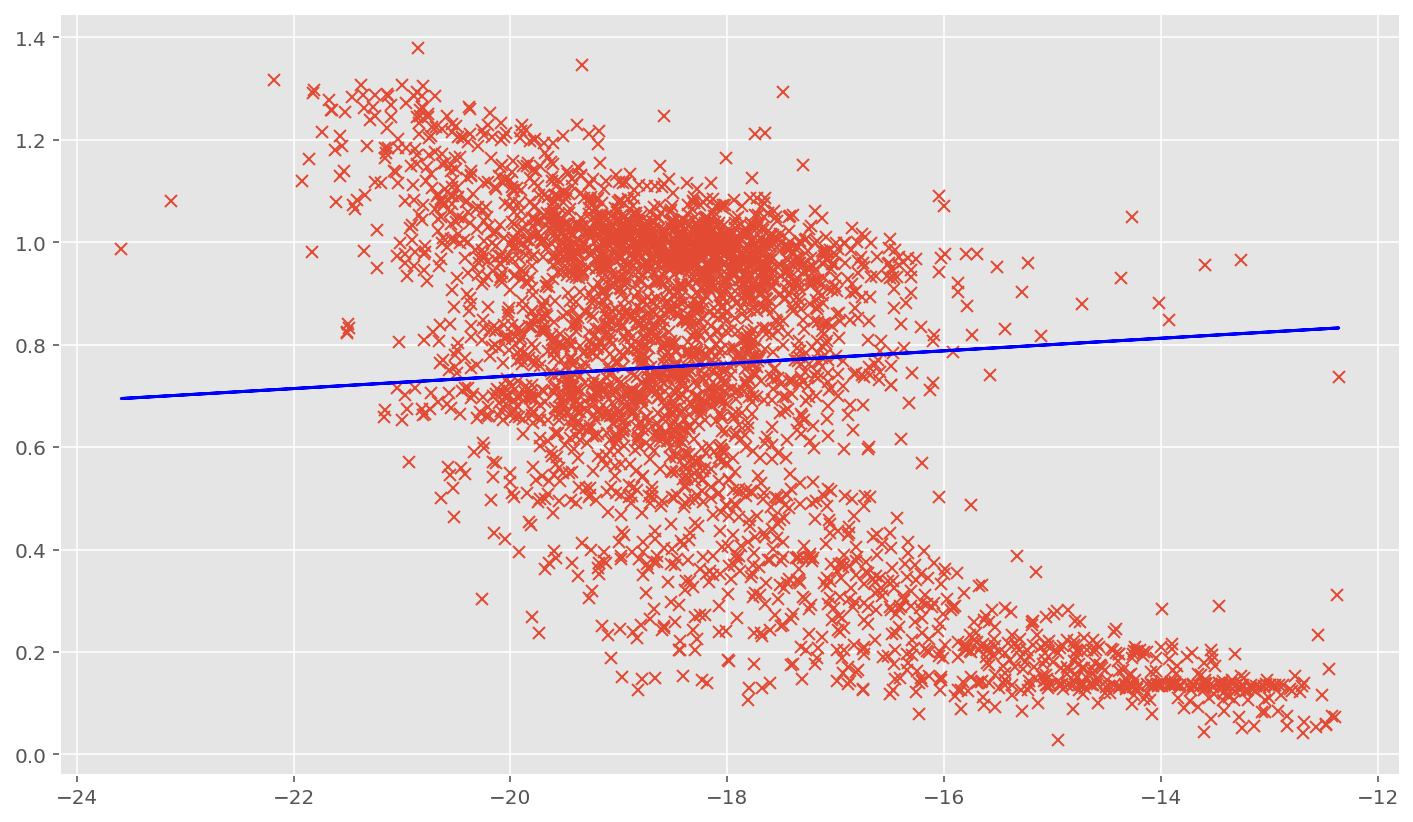

In [51]:


def descensGradient(x, y, theta, alpha = 0.0001, n_iteracions=50000):
    # alpha = ratio d'aprenentatge
    # theta = vector amb els valors W0, W1... etc. (Wj) que ens indicaran la posició de la recta. Inicialitzats aleatoriament. 
    # x = matriu amb els valors de les variables dependents.
    # y = vector amb els valors de la variable objectiu.
    
    m = len(y)
    costList = np.zeros(n_iteracions) #Vector per poder fer un seguiment del cost que va tenint la recta quan es va executant l'algorisme.
    
    thetaList = np.zeros((n_iteracions, theta.shape[0])) #Vector per poder fer un seguiment dels valors de Wj quan es va executant l'algorisme.
    prediccio = np.dot(x, theta) #Prediccio que fa la recta amb els Wj inicials.

    for it in range(n_iteracions):
        
        theta = theta - (alpha*(x.T.dot(prediccio-y))/m) #actualitzem els valors de Wj.
        prediccio = np.dot(x, theta)#Prediccio que fa la recta amb els Wj en el moment d'execució.
        
        thetaList[it, :] = theta.T #Ens guardem el theta actual.
        costList[it] = np.sum(np.square(prediccio-y))/(2*m) #tenint la predicció dels punts que faria la recta i els punts real podem calcular el cost
        
    return theta, costList, thetaList


X1 = np.array(X) #Tranformem X a un array

X2 = np.ones(shape=(X1.shape[0],2)) #Creem X2, una matriu plena de 1 que tingui 2 columnes i tantes fileres com té X1

for i in range(X1.shape[0]):
    X2[i][1] = X1[i][8] #assignem els valors de la columna 8 de X1 (millor valor per fer regressió) a la columna 1 de X2


Y1 = np.array(Y) #Transformem Y a un array.

theta=np.random.randn(2,1) #Generem una Wj aleatoria per a començar l'algorisme

iteracions=1000
ratio_aprenentatge=0.001

theta_final, cost_history, theta_history = descensGradient(X2, Y1, theta, ratio_aprenentatge, iteracions) #Cridem a la funció per calcular el gradient del descens


print(theta_final, cost_history[-5:])


plt.plot(range(iteracions),cost_history)
plt.show()


plt.plot(X2[:,1], Y1, "x")
plt.plot(X2[:,1], X2 @ theta_final, "b")
plt.show()

https://stackoverflow.com/questions/39771075/python-gradient-descent-cost-keeps-increasing --> learning rate més petit.


https://gist.github.com/sagarmainkar/41d135a04d7d3bc4098f0664fe20cf3c --> bases per progamar l'algorisme
Per cert, ho estic fent amb els valors no estandaritzats, però es canviar una linia.

Crec que se el que pasa,a  veure deixam probar un sec

endavant heheh

sad, no era aixo pero a vore un sec

ah coi, ja ho tinc, un sec que he de generalitzar una cosa

crec que es aquesta linea thetaList = np.zeros((n_iteracions, 2)) #Vector per poder fer un seguiment dels valors de Wj quan es va executant l'algorisme.
esta creat un vector 2d 
sip, aixo mateix

fck
vaig a probar-ho a local a veure si ho trobo 

perff

JA xutava jaja 
el problema es el nom de la funcio

jfklajdaskl en serio? per què aaa coi, que estava malament posat?

ns jajaj,

vale yata, mareta meva sisi, si que era aixo si, 

es que crec que com els punts estan distribuits d'una forma tan curiosa crec que hi ha un munt de màxims locals, i quan els troba gg

ja ns, perque la data que entra sempre es la mateixa no? a més no hi ha cap suffle o res de l'estil

el shuffle seria agafar els valors random de a on comença l'algorisme, suposo que si comença a segons que lloc minim local i pum

In [52]:
from mpl_toolkits import mplot3d 

X1= np.array(X) #Tranformem X a un array

X2 = np.ones(shape=(X1.shape[0],3)) #Creem X2, una matriu plena de 1 que tingui 2 columnes i tantes fileres com té X1

for i in range(X1.shape[0]):
    X2[i][1] = X1[i][8] #assignem els valors de la columna 8 de X1 (millor valor per fer regressió) a la columna 1 de X2
    X2[i][2] = X1[i][2]


Y1 = np.array(Y) #Transformem Y a un array.

theta=np.random.randn(3, 1) #Generem una Wj aleatoria per a començar l'algorisme
print(X2, X2.shape)
print(theta, theta.shape)
theta_final, cost_history, theta_history = descensGradient(X2, Y1, theta) #Cridem a la funció per calcular el gradient del descens

print(theta_final, cost_history[-5:])

[[  1.   -18.22 -17.76]
 [  1.   -19.77 -20.4 ]
 [  1.   -18.12 -17.67]
 ...
 [  1.   -19.44 -18.59]
 [  1.   -20.1  -19.89]
 [  1.   -17.71 -18.31]] (3375, 3)
[[-0.24574927]
 [ 0.67537661]
 [-0.09601991]] (3, 1)
[[-0.27084665]
 [-0.01061131]
 [-0.04541337]] [0.03330028 0.03330019 0.03330009 0.0333     0.0332999 ]


<ipython-input-54-3d852b78cc4a>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w = np.linalg.lstsq(A,predX3D)[0]


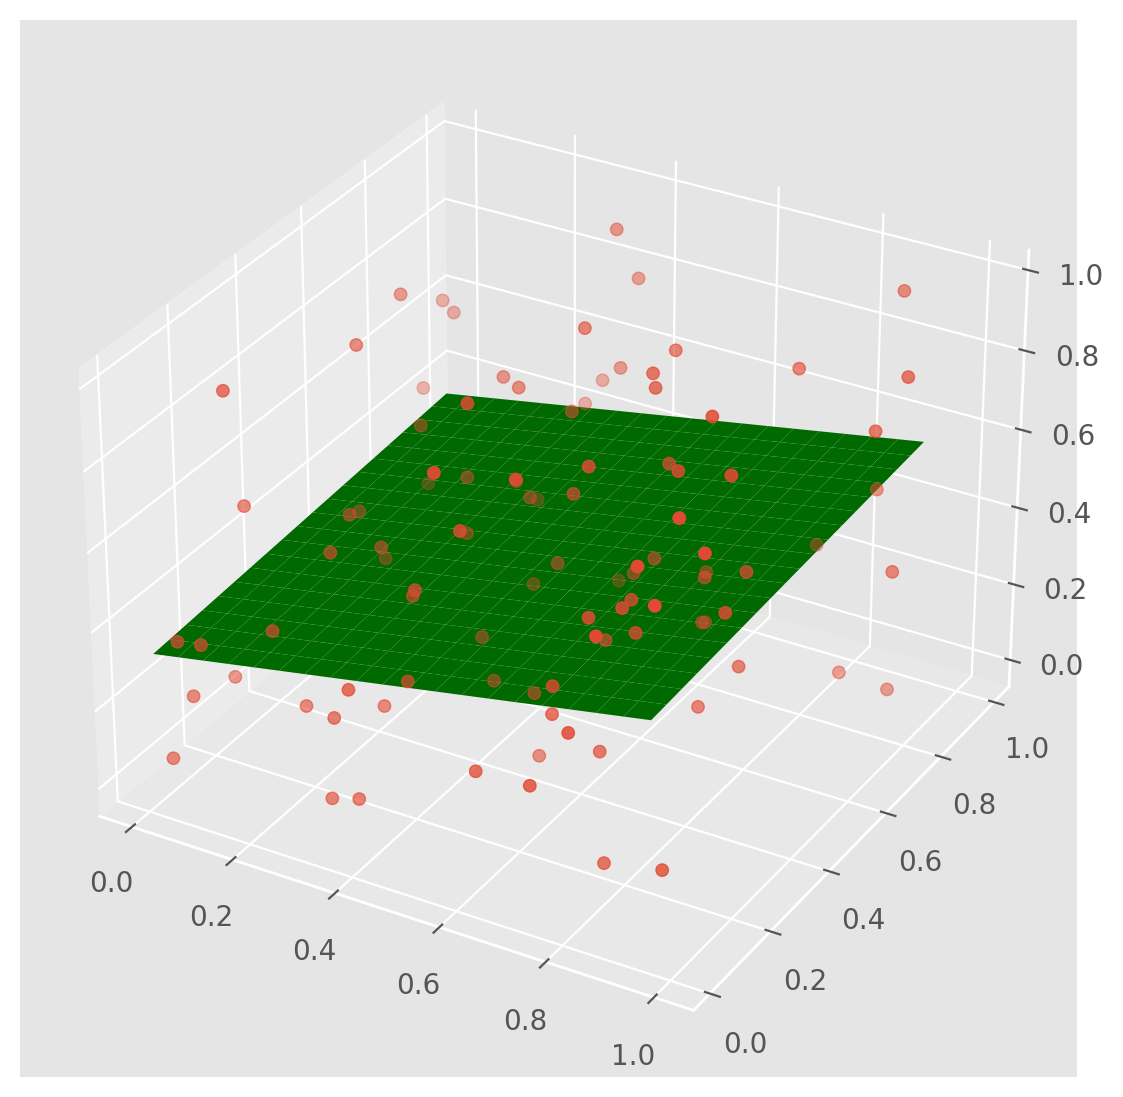

In [54]:
# Creem figura 3d
from mpl_toolkits.mplot3d import axes3d, Axes3D
import numpy as np
# generem dades 3D d'exemple
x_val = X2
y_val = Y1
regr = regression(x_val, y_val)
predX3D = regr.predict(x_val)

# Afegim els 1's
A = np.hstack((x_val,np.ones([x_val.shape[0],1])))
w = np.linalg.lstsq(A,predX3D)[0]

#Dibuixem
#1r creem una malla acoplada a la zona de punts per tal de representar el pla
malla = (range(20) + 0 * np.ones(20)) / 10 
malla_x1 =  malla * (max(x_val[:,0]) - min(x_val[:,0]))/2 + min(x_val[:,0])
malla_x2 =  malla * (max(x_val[:,1]) - min(x_val[:,1]))/2 + min(x_val[:,1])

#la funcio meshgrid ens aparella un de malla_x1 amb un de malla_x2, per atot
#element de mallax_1 i per a tot element de malla_x2.
xplot, yplot = np.meshgrid(malla_x1 ,malla_x2)

#ara creem la superficies que es un pla
zplot = w[0] * xplot + w[1] * yplot + w[2]

#Dibuixem punts i superficie
plt3d = plt.figure('Coeficiente prismatico -- Relacio longitud desplacament 3D', dpi=100.0).gca(projection='3d')
plt3d.plot_surface(xplot,yplot,zplot, color='green')
plt3d.scatter(x_val[:,0],x_val[:,1],y_val)